In [1]:
%matplotlib inline 


In [2]:
import rioxarray as rxr
import cv2
import rasterio as rio
import glob
from PIL import Image
import matplotlib.pyplot as plt
import general_file_handling as gfh
from shapely.geometry import LineString, MultiPolygon, Polygon
import numpy as np
from tqdm.notebook import tqdm, trange


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\osmnx\projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [3]:
#get all names from directory
#loop through all and maybe put them in a seperatefolder
#then apply ml model

In [4]:
pth = "C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/juli_aug/*.tif"

In [5]:
# pth = "C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/*.tif"
# pth = "C:/Users/hanna/Documents/EPA/scriptie/planet-understanding-the-amazon-from-space/train-tif-v2/*.tif"
# pth = "C:/Users/hanna/Documents/EPA/scriptie/planet-understanding-the-amazon-from-space/train-jpg/*.jpg"
pth = "C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/*.tif"

test_images =[]
test_images.extend(glob.glob(pth))


In [6]:
#TODO: report: not normalized images, because those were corrupt
#TODO: report: august due to?

In [7]:
test_images

['C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1069N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1070N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1071N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1072N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1073N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1074N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0603E-1075N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0604E-1069N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0604E-1070N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0604E-1071N.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug\\L15-0604E-1072N.tif',
 'C:/Users/hanna/Docu

In [8]:
#TODO: create nr correct tiles of nxn

def tiling(outpth, images_lst, size, nr_tiles):
    # outpth= 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_128/'
    for pth in images_lst:
        imgname = pth.split('\\')[-1].split('.')[0]
        rast = rxr.open_rasterio(pth)
        x1=0
        y1=0
        x2=size-1
        y2=size-1
        
        bounds_list = []

        for i in trange(nr_tiles):
            x1=0
            x2=size-1
            
            for j in range(nr_tiles):
                try:
                    # print(x1,x2,y1,y2)
                    rast_clip = rast[:,y1:y2, x1:x2]
                    rast_clip.rio.to_raster(outpth+ f'{imgname}_{i}{j}.tif')
                    raster2 = rast_clip[0].astype(float).rio.reproject("EPSG:4326")
                    rst2bounds = gfh.create_geom(raster2.rio.bounds())
                    bounds_list.append(rst2bounds.bounds)
                    # print(rst2bounds.bounds, pth, i)
                except:
                    print(pth, i)
                x1+=size
                x2+=size

            y1+=size
            y2+=size
            # print(rast_clip[0])
        rast=None

            
    return bounds_list




In [11]:
outpth= 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128/'

rast_clip = tiling(outpth, test_images,128, 32)

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.219e+06 -8.219e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+05
    spati

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    spatial_ref 

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    spatial_ref 

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+05
   

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    spatia

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    spatia

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.18e+06 -8.18e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+05
    spati

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    spatial_ref 

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    spatial_ref 

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.16e+06 -8.16e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+05
   

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    spatia

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    spatia

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_ref  i

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.995e+05 8.995e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 8.995e+05 8.995e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.983e+05 8.983e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.191e+05 9.191e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.191e+05 9.191e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.179e+05 9.179e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.393e+05 9.393e+05 ... 9.387e+05 9.387e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.386e+05 9.386e+05 9.386e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.374e+05 9.374e+

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.582e+05 9.582e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.582e+05 9.582e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.576e+05 9.576e+05 9.576e+05 ... 9.57e+05 9.57e+05
    

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.778e+05 9.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.778e+05 9.778e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.772e+05 9.772e+05 ... 9.766e+05 9.766e+05
    spatial_

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.974e+05 9.974e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.973e+05 9.973e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.961e+05 9.961e+05
    

  0%|          | 0/32 [00:00<?, ?it/s]

<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.017e+06 1.017e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.017e+06 1.017e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 127, x: 127)>
[16129 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.121e+06 -8.121e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.016e+06 1.016e+06
    spatial_

In [9]:
outpth= 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256/'

rast_clip = tiling(outpth, test_images,256, 16)

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+05
   

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.22e+06 -8.22e+06 ... -8.219e+06 -8.219e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_ref  int32 0

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    spatial_ref 

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+05
    spati

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_ref  int32 0

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    spatial_ref 

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    spatial_ref 

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.2e+06 -8.2e+06 ... -8.199e+06 -8.199e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_ref  int32 0

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.181e+06 -8.181e+06 ... -8.179e+06 -8.179e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+05
   

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.161e+06 -8.161e+06 ... -8.16e+06 -8.16e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+05
   

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    spatia

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.141e+06 -8.141e+06 ... -8.14e+06 -8.14e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_ref  i

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.989e+05 8.989e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 8.989e+05 8.989e+05 ... 8.977e+05 8.977e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 8.977e+05 8.977e+05 ... 8.965e+05 8.965e+05
    spatial_

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.185e+05 9.185e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.185e+05 9.185e+05 ... 9.173e+05 9.173e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.172e+05 9.172e+05 9.172e+05 ... 9.16e+05 9.16e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.393e+05 9.393e+05 9.392e+05 ... 9.38e+05 9.38e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.38e+05 9.38e+05 9.38e+05 ... 9.368e+05 9.368e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.368e+05 9.368e+05 ... 9.356e+05 9.356e+

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.588e+05 9.588e+05 ... 9.576e+05 9.576e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.576e+05 9.576e+05 ... 9.564e+05 9.564e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.564e+05 9.564e+05 ... 9.552e+05 9.552e+05
    spatial_

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.784e+05 9.784e+05 ... 9.772e+05 9.772e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.772e+05 9.772e+05 9.772e+05 ... 9.76e+05 9.76e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.759e+05 9.759e+05 ... 9.747e+05 9.747e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.98e+05 9.98e+05 9.979e+05 ... 9.968e+05 9.967e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.967e+05 9.967e+05 ... 9.955e+05 9.955e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 9.955e+05 9.955e+05 ... 9.943e+05 9.943e+05
    

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.018e+06 1.018e+06 ... 1.016e+06 1.016e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.016e+06 1.016e+06 ... 1.015e+06 1.015e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
<xarray.DataArray (y: 255, x: 255)>
[65025 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 -8.122e+06 -8.122e+06 ... -8.121e+06 -8.121e+06
  * y            (y) float64 1.015e+06 1.015e+06 ... 1.014e+06 1.014e+06
    spatial_

(-73.12499998978754, 9.096723320871565, -73.11954128080282, 9.102096737528404)
Number of bboxes: 1024


C:\Users\hanna\AppData\Local\Temp\ipykernel_27760\2429752083.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


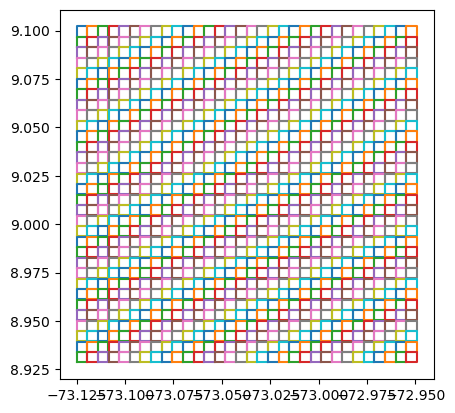

In [15]:
validate =True
if validate == True:
    # bbox = [float(0), float(3), float(9), float(4)]
    # bbox_lst = gfh.clipping_bbox(bbox, 40)
    # bbox = [[float(0), float(3), float(9), float(4)]]
    
    print(rast_clip[0])
    pol_lst = [Polygon([[long0, lat0],
                            [long1,lat0],
                            [long1,lat1],
                            [long0, lat1]]) for long0, lat0, long1, lat1 in rast_clip]
    
    print(f'Number of bboxes: {len(rast_clip)}')

    fig, ax = plt.subplots()
    for pol in pol_lst[:]:
        ax.plot(*pol.exterior.xy)
        ax.set_aspect('equal', adjustable='box')
    fig.show()

In [16]:
from PIL import Image
def conv(images_lst):
    # outpth= 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256/'
    for pth in images_lst:
        print(pth)
        imgname = pth.split('.')[0]
        # print(rast.coords)
    
        
        im = Image.open(pth)
        # print('im loaded')
        im.thumbnail(im.size)
        # print('im thumb')
        rgb_im = im.convert('RGB')
        # print('im rgb')
        rgb_im.save(f'{imgname}.jpg', "JPEG", subsampling=0, quality=100)
      




In [17]:
pth = 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256/*.tif'
test_images_256 =[]
test_images_256.extend(glob.glob(pth))
conv(test_images_256)

C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_00.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_01.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_010.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_011.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_012.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_013.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_014.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_015.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_02.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\L15-0603E-1069N_03.tif
C:/Users/hanna/Documents

In [18]:
pth = 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128/*.tif'
test_images_128 =[]
test_images_128.extend(glob.glob(pth))
conv(test_images_128)

C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_00.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_01.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_010.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_011.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_012.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_013.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_014.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_015.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_016.tif
C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_128\L15-0603E-1069N_017.tif
C:/Users/hanna/Documen

C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/augustus_normalized/tiles_256\L15-0603E-1069N_00.tif


UnidentifiedImageError: cannot identify image file 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/augustus_normalized/tiles_256\\L15-0603E-1069N_00.tif'

### TOT hier

In [ ]:
with rio.open(test_images[0]) as src_dataset:
    kwds = src_dataset.profile
    print(src_dataset.meta)
    kwds['dtype'] = 'uint8'
    src_meta = src_dataset.meta
    print(src_dataset.meta)
    dem_array = src_dataset.read(1).astype('uint8')

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:

# write a new raster with the copied and altered meta
with rio.open(test_images[0], 'w', **kwds) as dst_dataset:
    dst_meta = dst_dataset.meta

src_dataset.close()
dst_dataset.close()

In [ ]:
im = Image.open(test_images[0])
print('im loaded')
im.thumbnail(im.size)
rgb_im = im.convert('RGB')

print('im thumb')
# im.save(outpth+ f'{imgname}_{i}.jpg', "JPEG", subsampling=0, quality=100)


im loaded
im thumb


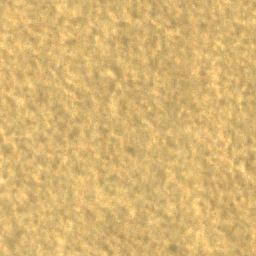

In [ ]:
rgb_im

In [ ]:
dem_array.shape

(256, 256)

In [ ]:
from skimage import io


path = test_images[0]
img = io.imread(path)
bgr = img[:,:,:3]
rgb = bgr[:, :, [2,1,0]]



In [ ]:


rast = rxr.open_rasterio(test_images[0])
jpg = Image.open(test_images[0])


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [ ]:
rast.encoding

{'grid_mapping': 'spatial_ref',
 'source': 'C:/Users/hanna/Documents/EPA/scriptie/planet-understanding-the-amazon-from-space/train-tif-v2/train_0.tif',
 'rasterio_dtype': 'uint16'}

In [ ]:
rast.rio.update_encoding({'grid_mapping': 'spatial_ref',
 'source': 'C:/Users/hanna/Documents/EPA/scriptie/planet-understanding-the-amazon-from-space/train-tif-v2/train_0.tif',
 'rasterio_dtype': 'uint8'}, inplace = True)

<xarray.DataArray (band: 4, y: 256, x: 256)>
[262144 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
Attributes:
    TIFFTAG_DATETIME:          2017:04:26 23:11:27
    TIFFTAG_IMAGEDESCRIPTION:  {"shape": [256, 256, 4]}
    TIFFTAG_SOFTWARE:          tifffile.py
    scale_factor:              1.0
    add_offset:                0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


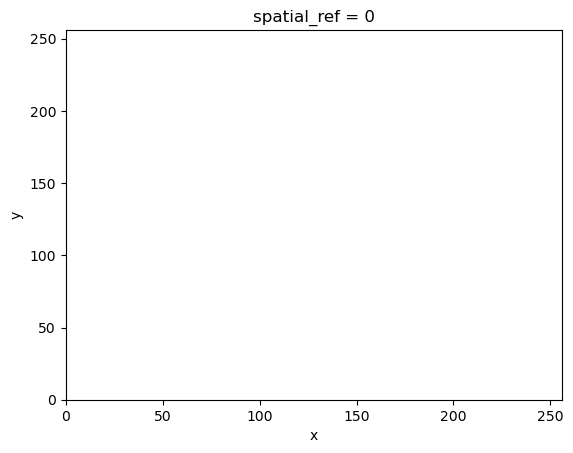

In [ ]:
rast.astype('uint16').plot.imshow()

In [ ]:
rast

<xarray.DataArray (band: 4, y: 256, x: 256)>
[262144 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
Attributes:
    TIFFTAG_DATETIME:          2017:04:26 23:11:27
    TIFFTAG_IMAGEDESCRIPTION:  {"shape": [256, 256, 4]}
    TIFFTAG_SOFTWARE:          tifffile.py
    scale_factor:              1.0
    add_offset:                0.0

In [ ]:
print(rast[0].mean(), rast[1].mean(), rast[2].mean())

<xarray.DataArray ()>
array(91.78738403)
Coordinates:
    band         int32 1
    spatial_ref  int32 0 <xarray.DataArray ()>
array(109.34700012)
Coordinates:
    band         int32 2
    spatial_ref  int32 0 <xarray.DataArray ()>
array(103.60914612)
Coordinates:
    band         int32 3
    spatial_ref  int32 0


In [ ]:
print(rast[0].mean(), rast[1].mean(), rast[2].mean(), rast[3].mean())

<xarray.DataArray ()>
array(57.39385235)
Coordinates:
    band         int32 1
    spatial_ref  int32 0 <xarray.DataArray ()>
array(63.05458724)
Coordinates:
    band         int32 2
    spatial_ref  int32 0 <xarray.DataArray ()>
array(25.41668892)
Coordinates:
    band         int32 3
    spatial_ref  int32 0 <xarray.DataArray ()>
array(255.)
Coordinates:
    band         int32 4
    spatial_ref  int32 0


In [ ]:
print(rast[0].mean(), rast[1].mean(), rast[2].mean(), rast[3].mean())

<xarray.DataArray ()>
array(5226.03926086)
Coordinates:
    band         int32 1
    spatial_ref  int32 0 <xarray.DataArray ()>
array(4369.52697754)
Coordinates:
    band         int32 2
    spatial_ref  int32 0 <xarray.DataArray ()>
array(2823.25704956)
Coordinates:
    band         int32 3
    spatial_ref  int32 0 <xarray.DataArray ()>
array(6126.06962585)
Coordinates:
    band         int32 4
    spatial_ref  int32 0


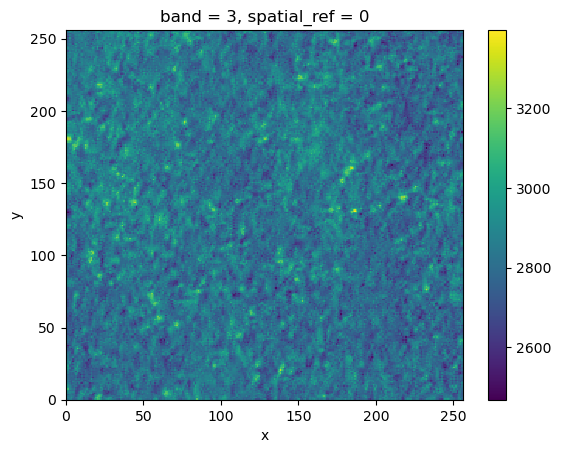

In [ ]:
rast[2].plot()

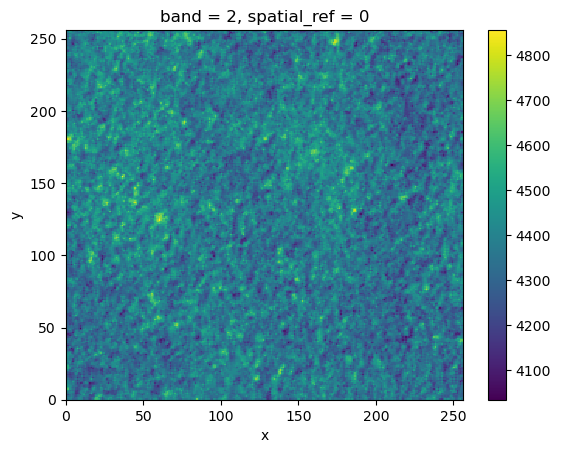

In [ ]:
rast[1].plot()

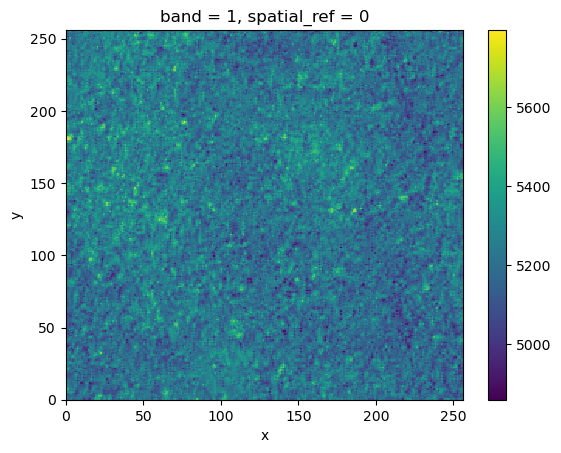

In [ ]:
rast[0].plot()

In [ ]:
from PIL import Image
outpth= 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256/'

for pth in test_images:
        imgname = pth.split('\\')[-1].split('.')[0]
        rast = rxr.open_rasterio(pth)
        print(rast.coords)
        x1=0
        y1=0
        x2=256
        y2=256

        size=256


        im = Image.open(pth)
        print('im loaded')
        im.thumbnail(im.size)
        print('im thumb')
        rgb_im = im.convert('RGB')
        rgb_im.save(pth+ f'{imgname}.jpg', "JPEG", subsampling=0, quality=100)

        rast=None


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im l

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coor

c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be ret

im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int32 0
im loaded
im thumb


c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\rioxarray\_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


KeyboardInterrupt: 

In [ ]:
im.save(outpth+ f'{imgname}_{i}.jpg', "JPEG", subsampling=0, quality=100)


NameError: name 'im' is not defined

In [ ]:
outpth= 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256/'

tiling(outpth, test_images,256, 16)

Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -8.355e+06 -8.355e+06 ... -8.336e+06 -8.336e+06
  * y            (y) float64 9.001e+05 9.001e+05 ... 8.806e+05 8.806e+05
    spatial_ref  int32 0
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-1069N.tif 0
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-1069N.tif 1
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-1069N.tif 2
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-1069N.tif 3
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-1069N.tif 4
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -8.355e+06 -8.355e+06 ... -8.336e+06 -8.336e+06
  * y            (y) float64 9.197e+05 9.197e+05 ... 9.001e+05 9.001e+05
    spatial_ref  int32 0
im loaded
im thumb
C:/Users/hanna/Documents/EPA/scriptie/large_sat_img\L15-0597E-10

In [ ]:
import os
from PIL import Image

yourpath = os.getcwd()
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print "A jpeg file already exists for %s" % name
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root, name))
                    print "Generating jpeg for %s" % name
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except Exception, e:
                    print e

test_images597-1077,598-1077,599-1077,600-1077,601-1077,602-1077,603-1077,604-1077,605-1077,606-1077,607-1077,608-1077,609-1077,610-1077,611-1077,612-1077,613-1077,597-1076,598-1076,599-1076,600-1076,601-1076,602-1076,603-1076,604-1076,605-1076,606-1076,607-1076,608-1076,609-1076,610-1076,611-1076,612-1076,613-1076,597-1075,598-1075,599-1075,600-1075,601-1075,602-1075,603-1075,604-1075,605-1075,606-1075,607-1075,608-1075,609-1075,610-1075,611-1075,612-1075,613-1075,597-1074,598-1074,599-1074,600-1074,601-1074,602-1074,603-1074,604-1074,605-1074,606-1074,607-1074,608-1074,609-1074,610-1074,611-1074,612-1074,613-1074,597-1073,598-1073,599-1073,600-1073,601-1073,602-1073,603-1073,604-1073,605-1073,606-1073,607-1073,608-1073,609-1073,610-1073,611-1073,612-1073,613-1073,597-1072,598-1072,599-1072,600-1072,601-1072,602-1072,603-1072,604-1072,605-1072,606-1072,607-1072,608-1072,609-1072,610-1072,611-1072,612-1072,613-1072,597-1071,598-1071,599-1071,600-1071,601-1071,602-1071,603-1071,604-1071,605-1071,606-1071,607-1071,608-1071,609-1071,610-1071,611-1071,612-1071,613-1071,597-1070,598-1070,599-1070,600-1070,601-1070,602-1070,603-1070,604-1070,605-1070,606-1070,607-1070,608-1070,609-1070,610-1070,611-1070,612-1070,613-1070,597-1069,598-1069,599-1069,600-1069,601-1069,602-1069,603-1069,604-1069,605-1069,606-1069,607-1069,608-1069,609-1069,610-1069,611-1069,612-1069,613-1069,597-1068,598-1068,599-1068,600-1068,601-1068,602-1068,603-1068,604-1068,605-1068,606-1068,607-1068,608-1068,609-1068,610-1068,611-1068,612-1068,613-1068,597-1067,598-1067,599-1067,600-1067,601-1067,602-1067,603-1067,604-1067,605-1067,606-1067,607-1067,608-1067,609-1067,610-1067,611-1067,612-1067,613-1067,597-1066,598-1066,599-1066,600-1066,601-1066,602-1066,603-1066,604-1066,605-1066,606-1066,607-1066,608-1066,609-1066,610-1066,611-1066,612-1066,613-1066,597-1065,598-1065,599-1065,600-1065,601-1065,602-1065,603-1065,604-1065,605-1065,606-1065,607-1065,608-1065,609-1065,610-1065,611-1065,612-1065,613-1065,597-1064,598-1064,599-1064,600-1064,601-1064,602-1064,603-1064,604-1064,605-1064,606-1064,607-1064,608-1064,609-1064,610-1064,611-1064,612-1064,613-1064,597-1063,598-1063,599-1063,600-1063,601-1063,602-1063,603-1063,604-1063,605-1063,606-1063,607-1063,608-1063,609-1063,610-1063,611-1063,612-1063,613-1063,597-1062,598-1062,599-1062,600-1062,601-1062,602-1062,603-1062,604-1062,605-1062,606-1062,607-1062,608-1062,609-1062,610-1062,611-1062,612-1062,613-1062,597-1061,598-1061,599-1061,600-1061,601-1061,602-1061,603-1061,604-1061,605-1061,606-1061,607-1061,608-1061,609-1061,610-1061,611-1061,612-1061,613-1061,597-1060,598-1060,599-1060,600-1060,601-1060,602-1060,603-1060,604-1060,605-1060,606-1060,607-1060,608-1060,609-1060,610-1060,611-1060,612-1060,613-1060,597-1059,598-1059,599-1059,600-1059,601-1059,602-1059,603-1059,604-1059,605-1059,606-1059,607-1059,608-1059,609-1059,610-1059,611-1059,612-1059,613-1059,597-1058,598-1058,599-1058,600-1058,601-1058,602-1058,603-1058,604-1058,605-1058,606-1058,607-1058,608-1058,609-1058,610-1058,611-1058,612-1058,613-1058

Selected location

9.42° - 6.12° N, 72.1° - 75° W

In [ ]:
rast = rxr.open_rasterio("C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/L15-0608E-1075N0.tif")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\xarray\backends\file_manager.py", line 210, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "c:\Users\hanna\Anaconda3\envs\geothings\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<function open at 0x0000015ADFBCE200>, ('C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/L15-0608E-1075N0.tif',), 'r', (('sharing', False),), '05923537-66d2-4db0-9b05-81358bfcecad']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "rasterio\_base.pyx", line 308, in rasterio._base.DatasetBase.__init__
  File "rasterio\_base.pyx", line 219, in rasterio._base.open_dataset
  File "rasterio\_err.pyx", line 221, in rasterio._err.exc_wrap_pointer
rasterio._err.CPLE_OpenFailedError: C:/Users/hanna/Documen

In [ ]:
rast

In [ ]:
image = cv2.imread("C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/L15-0608E-1075N0.tif")

In [ ]:
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
4096/256

16.0

In [ ]:
import numpy as np
from tiler import Tiler, Merger
from matplotlib import image as img
# image = np.random.random((3, 1920, 1080))

# Setup tiling parameters

image = np.array(Image.open("C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/L15-0608E-1075N.tif"))  # 1280x1920x3
tiler = Tiler(data_shape=image.shape,
              tile_shape=(128, 128, 4),
              channel_dimension=0)

## Access tiles:
# 1. with an iterator
for tile_id, tile in tiler.iterate(image):
   img.imsave(f'{tile_id}.tiff', tile)

#    print(f'Tile {tile_id} out of {len(tiler)} tiles.')
# # 1b. the iterator can also be accessed through __call__
# for tile_id, tile in tiler(image):
#    print(f'Tile {tile_id} out of {len(tiler)} tiles.')
# # 2. individually
# tile_3 = tiler.get_tile(image, 3)
# # 3. in batches
# tiles_in_batches = [batch for _, batch in tiler(image, batch_size=10)]

# # Setup merging parameters
# merger = Merger(tiler)

# ## Merge tiles:
# # 1. one by one
# for tile_id, tile in tiler(image):
#    merger.add(tile_id, some_processing_fn(tile))
# # 2. in batches
# merger.reset()
# for batch_id, batch in tiler(image, batch_size=10):
#    merger.add_batch(batch_id, 10, batch)

# # Final merging: applies tapering and optional unpadding
# final_image = merger.merge(unpad=True)  # (3, 1920, 1080)

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np
image = np.array(Image.open('../Data/dem/ASTGTMV003_N08W074_clipped_dem.tif'))  # 1280x1920x3

In [ ]:
image.shape

(1440, 1440)

In [ ]:
tiles_in_batches

[array([[[[25, 38, 15, ...,  0,  0,  0],
          [24, 35, 17, ...,  0,  0,  0],
          [20, 34, 17, ...,  0,  0,  0],
          ...,
          [32, 44, 22, ...,  0,  0,  0],
          [29, 43, 18, ...,  0,  0,  0],
          [27, 39, 17, ...,  0,  0,  0]],
 
         [[26, 38, 18, ...,  0,  0,  0],
          [23, 36, 17, ...,  0,  0,  0],
          [22, 34, 16, ...,  0,  0,  0],
          ...,
          [33, 45, 21, ...,  0,  0,  0],
          [28, 41, 13, ...,  0,  0,  0],
          [30, 40, 14, ...,  0,  0,  0]],
 
         [[26, 40, 20, ...,  0,  0,  0],
          [24, 36, 18, ...,  0,  0,  0],
          [23, 32, 14, ...,  0,  0,  0],
          ...,
          [30, 44, 17, ...,  0,  0,  0],
          [29, 40, 13, ...,  0,  0,  0],
          [31, 43, 15, ...,  0,  0,  0]]],
 
 
        [[[29, 43, 19, ...,  0,  0,  0],
          [30, 49, 26, ...,  0,  0,  0],
          [30, 47, 22, ...,  0,  0,  0],
          ...,
          [12, 18,  7, ...,  0,  0,  0],
          [14, 18,  4, ...

In [ ]:
tile_3 = tiler.get_tile(image, 3)

In [ ]:
tile_3.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

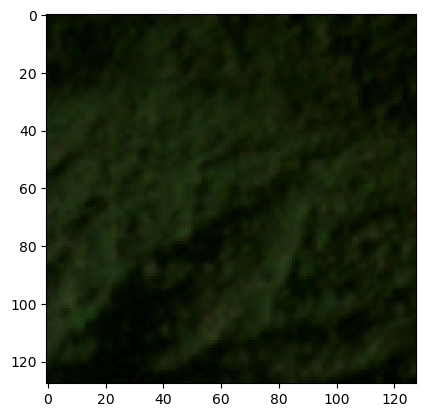

In [ ]:

# ssed_tile = process(tile_3)
from matplotlib import pyplot as plt
plt.imshow(tile_3, interpolation='nearest')

In [ ]:
img = Image.fromarray(tile_3)
img.save('my.png')
img.show()

In [ ]:
img.show()

In [ ]:
tile_3.squeeze()

array([[[ 5, 12,  0, ...,  0,  0,  0],
        [ 7, 16,  0, ...,  0,  0,  0],
        [11, 20,  0, ...,  0,  0,  0],
        ...,
        [11, 16,  0, ...,  0,  0,  0],
        [ 6, 15,  0, ...,  0,  0,  0],
        [ 0, 11,  0, ...,  0,  0,  0]],

       [[ 6, 12,  0, ...,  0,  0,  0],
        [ 5, 16,  0, ...,  0,  0,  0],
        [ 8, 19,  0, ...,  0,  0,  0],
        ...,
        [ 7, 12,  0, ...,  0,  0,  0],
        [ 7, 15,  0, ...,  0,  0,  0],
        [ 6, 15,  0, ...,  0,  0,  0]],

       [[ 4, 11,  0, ...,  0,  0,  0],
        [ 3, 15,  0, ...,  0,  0,  0],
        [ 5, 19,  0, ...,  0,  0,  0],
        ...,
        [ 8, 15,  0, ...,  0,  0,  0],
        [ 9, 19,  0, ...,  0,  0,  0],
        [13, 22,  0, ...,  0,  0,  0]]], dtype=uint8)